In [4]:
# Dynamics of the various shells of DM halo around a PBH of mass, M_PBH=100 
# solar mass at different initial radii

%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
from module2 import *
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
 

π = np.pi
Ω_cdm = 0.85
G = 6.67e-11                # in units of m^3⋅kg^−1⋅s^−2
M_solar = 1.989e30          # in units of kg
A = 1.495e11                # Astronomical unit
pc = 3.085e16               # in unist of meter. 
Λ = 2.036e-35               # in units of s⁻2
c = 3e8                     # in units of ms⁻¹
yr = 3.154e7                # in units of seconds
t_m = 13.78e9 * yr          #in units of yrs corresponding to t_0=13.78Gyr
t_eq = 1.5923e12            # in units of seconds
ρ_eq = 2.1548e-16           # in units of kg m^-3
ρ_meq = ρ_eq/2              # in units of kg m^-3
σ_eq = 0.005
a_eq = 2.9374e-4



#Plot of the Bondi radius for PBHs of different PBH masses with speed of sound 
# c_s  as a function of the redshift.
# For x = x_bar, most probable value of a for PBH binaries merging today

def semi_mp(m_1, m_2, Δ_1, Δ_2): 
    
    def f_(m):
        return f * P(m)
    
    def f_b(m_1, m_2):
        return  f_(m_1) + f_(m_2)
    
    m_b = m_1 + m_2
    
    def x̄(m_1, m_2, Δ_1, Δ_2):
        return (((3 * (m_1 + m_2))/(4 * π * ρ_eq * f_b(m_1, m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
    def X_mp(m_1, m_2, Δ_1, Δ_2):
        k_nohalo = 22.3821
        A_nohalo = ((ρ_eq**(4/3))*(G**3)*(k_nohalo**7))/(c**5)
        def B_nohalo(m_1,m_2,Δ_1,Δ_2):
            return (A_nohalo**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))
        return (2**(-21/74)) * ((B_nohalo(m_1, m_2, Δ_1, Δ_2))**(21/37))
    
    def λ_mp(m_1, m_2, Δ_1, Δ_2):   #λ_0
            return  X_mp(m_1, m_2, Δ_1, Δ_2)/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    return  (0.0977* λ_mp(m_1, m_2, Δ_1, Δ_2) + 0.0068 * (λ_mp(m_1, m_2, Δ_1, Δ_2)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X_mp(m_1, m_2, Δ_1, Δ_2)**(1/3))




z = np.geomspace(1, 1e6, 100000)
z_list = z.tolist()
r_B_list = np.zeros(len(z_list))


bin_centres = np.geomspace(1e4, 1e-4, 6)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m_1 = np.geomspace(1e4, 1e-4, 6)
m_2 = np.geomspace(1e4, 1e-4, 6)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist() 

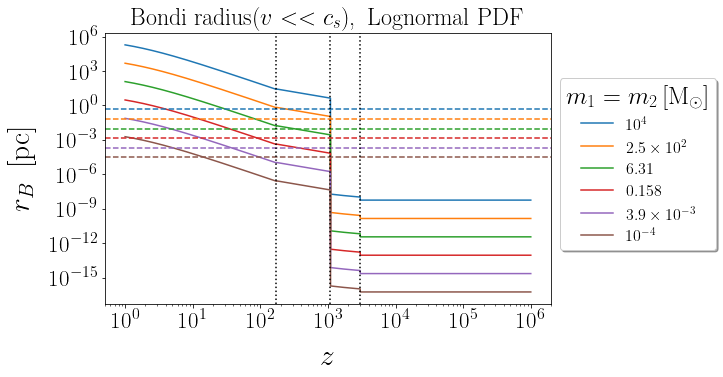

In [7]:
f_pbh = 1.61e-3
f = 0.85 * f_pbh
def P(m):                  #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15  * M_solar              #in units of M☉,
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))


fig, ax = plt.subplots(1, figsize=(8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']
for j, (m_1, m_2, Δ_1, Δ_2, clr) in enumerate(zip(m_1_list, m_2_list, Δ_1_list, Δ_2_list, colors)):
    m_1*= M_solar
    m_2*= M_solar
    Δ_1*= M_solar
    Δ_2*= M_solar
    for i, z in enumerate(z_list):
        m = (m_1 + m_2)
        r_B_list[i] = r_B(m, z)
    ax.loglog(z_list, r_B_list/pc, color = clr)
for k, (m_1, m_2, Δ_1, Δ_2, clr) in enumerate(zip(m_1_list, m_2_list, Δ_1_list, Δ_2_list, colors)):
    m_1*= M_solar
    m_2*= M_solar
    Δ_1*= M_solar
    Δ_2*= M_solar
    ax.axhline(y = semi_mp(m_1, m_2, Δ_1, Δ_2)/pc,linestyle = '--', color = clr)


plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec, color = 'k',  linestyle = ':')
plt.axvline(x = z_th, color = 'k',  linestyle = ':')
plt.xlim(0.5, 2e6)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$r_{B} \, $ [pc]',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m_{1} = m_{2}\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.title('Bondi radius($v<< c_{s}$),\, Lognormal PDF', fontsize = 24, pad = 8)
plt.savefig('r_B_lgnml.pdf', bbox_inches = 'tight')
plt.show()

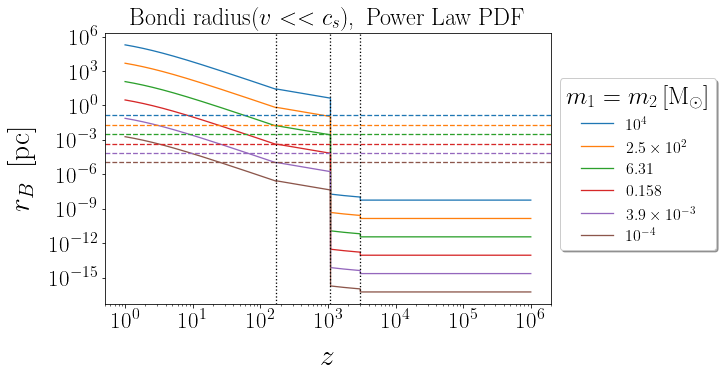

In [8]:
f_pbh = 2.53e-2     #choosen as per microlensing constraints
f = 0.85*f_pbh

def P(m):     #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-4      #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))


fig, ax = plt.subplots(1, figsize=(8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']
for j, (m_1, m_2, Δ_1, Δ_2, clr) in enumerate(zip(m_1_list, m_2_list, Δ_1_list, Δ_2_list, colors)):
    m_1*= M_solar
    m_2*= M_solar
    Δ_1*= M_solar
    Δ_2*= M_solar
    for i, z in enumerate(z_list):
        m = (m_1 + m_2)        # We take Bondi radius for PBH of point mass (m_1 + m_2)
        r_B_list[i] = r_B(m, z)
    ax.loglog(z_list, r_B_list/pc, color = clr)
for k, (m_1, m_2, Δ_1, Δ_2, clr) in enumerate(zip(m_1_list, m_2_list, Δ_1_list, Δ_2_list, colors)):
    m_1*= M_solar
    m_2*= M_solar
    Δ_1*= M_solar
    Δ_2*= M_solar
    ax.axhline(y = semi_mp(m_1, m_2, Δ_1, Δ_2)/pc, linestyle = '--', color = clr)


plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec, color = 'k',  linestyle = ':')
plt.axvline(x = z_th, color = 'k',  linestyle = ':')
plt.xlim(0.5, 2e6)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$r_{B} \, $ [pc]',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m_{1} = m_{2}\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.title('Bondi radius($v<< c_{s}$),\, Power Law PDF', fontsize = 24, pad = 8)
plt.savefig('r_B_PWR.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# Bondi radius r_B increases with increase in m_pbh.

# We see in the above plots that r_B >> a_* for PBH binaries of equal masses.

# Speed of sound c_s suddenly increases at z_rec because matter and 
# the radiation decouples due to which the pressure decreases.

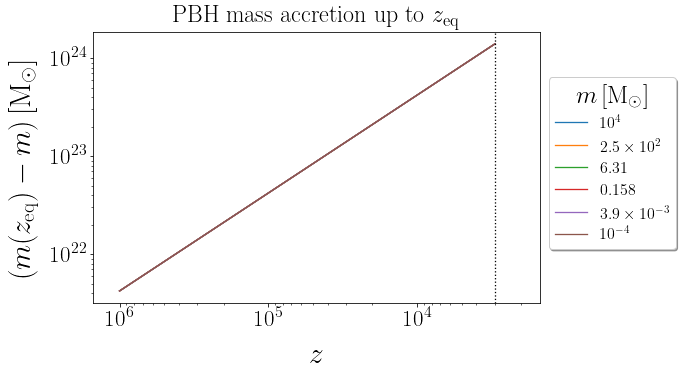

In [44]:
def m_acc_eq(z):
    c_s = c/np.sqrt(3)
    return (1/(2 * ρ_b0 * z))  * (((16 * π * ρ_eq * G)/3)**(1/2)) * (1/((4 * π * (G**2))/(c_s**3)))
    
    

fig, ax = plt.subplots(1, figsize = (8, 5))
z = np.geomspace(1e6, z_eq, 100000)
z_list = z.tolist()
m_acc_list = np.zeros(len(z_list))
m_change_list = np.zeros(len(z_list))


    
for i, m in enumerate(m_1_list):
    m*= M_solar
    for j, z in enumerate(z_list):
        m_change_list[j] =  m_acc_eq(z) - m
    ax.loglog(z_list, m_change_list/M_solar, '')    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')




plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$(m(z_\mathrm{eq}) - m) \, [\mathrm{M_{\odot}}]$',fontsize = 29.5, labelpad = 12)
plt.xlim(1.5e6, 0.5*z_eq)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)


plt.title('PBH mass accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('pbh_mass.pdf', bbox_inches = 'tight')
plt.show()